## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df = pd.read_csv('ab_data.csv')

In [5]:
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [6]:
df.shape

(294478, 5)

*Number of rows = 294,478*

c. The number of unique users in the dataset.

In [7]:
df.user_id.nunique()

290584

*Number of unique users = 290,584*

d. The proportion of users converted.

In [8]:
# For this answer simply calculate the mean of the column "Converted"
df.converted.mean()

0.11965919355605512

*Answer = 0.11965919355605512*

e. The number of times the `new_page` and `treatment` don't match.

In [9]:
# I was unsure how to do this tidily (groupby was a bit mess), I referenced this forum post:
# https://stackoverflow.com/questions/33271098/python-get-a-frequency-count-based-on-two-columns-variables-in-pandas-datafra
pd.crosstab(df.group,df.landing_page)

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [10]:
1928 + 1965

3893

*Answer = 3893*

f. Do any of the rows have missing values?

In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

*Answer: No, none of the rows have missing values*

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
# We can easily see how to do this by reverse engineering the Double Checking code in the next line
# Reminder: Add code to also keep the Control & Old Page matching values.

df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) | ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

*Check: The Double Check shows that none remain*

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.user_id.nunique()

290584

*Answer: There are 290,548 unique user_ids*

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
# Reference Material = 
# https://www.codegrepper.com/code-examples/python/pandas+find+duplicates+in+a+column

df2[df2.duplicated(subset=['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


*Answer: Duplicated Rows are 1899 and 2893 (User ID - 773192), as we can see above the entire row, aside from the timestamp, is the same.*

c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2.duplicated(subset=['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
# This code isn't too different from the one used to look up the information to begin with.
# We can use the same subset = part as we know it worked earlier to look up the duplicate.
df2=df2.drop_duplicates(subset=['user_id'])

In [18]:
# We can check if the above worked.

df2[df2.duplicated(subset=['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


*As we can see we are no longer having anything returned with this code so we can safely say that the duplicate was dropped.*

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
# This is the same as we did earlier for df, we just do it again for df2

df2.converted.mean()

0.11959708724499628

*Answer = 0.1196 (to 4 decimal places)*

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
# Same as above but just add in the group = control parameter.

df2[df2['group'] == 'control'].converted.mean()

0.1203863045004612

*Answer = 0.1204 (to 4 decimal places)*

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
# same as the above just change the group to be treatment.

df2[df2['group'] == 'treatment'].converted.mean()

0.11880806551510564

*Answer = 0.1188 (to 4 decimal places)*

d. What is the probability that an individual received the new page?

In [22]:
# I will do the following in parts to make it easier to follow and to also check I am not making mistakes.
# This first part is getting the number of rows in our data set where the user has new page.

df2[df2['landing_page'] == 'new_page'].shape[0]

145310

In [23]:
# Row number for all of df2.
df2.shape[0]

290584

In [24]:
# Now we just put these two pieces of code together and it should do 145310/290584 to give us the probability.

df2[df2['landing_page'] == 'new_page'].shape[0] / df2.shape[0]

0.5000619442226688

*Answer = 0.5001 (to 4 decimal places)*

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [25]:
# For more information we can compare the treatment group probabilities that we worked out earlier and check the difference.

control_convert = df2[df2['group'] == 'control'].converted.mean()
treatment_convert = df2[df2['group'] == 'treatment'].converted.mean()

convert_group_diff = treatment_convert - control_convert
convert_group_diff

-0.0015782389853555567

**Answer**

We can say the following is true:
- The probablity of conversion regardless of what page the individual recieved is 11.96%
- The probability of conversion of an individual in the control group is 12.04%
- The probability of conversion of an individual in the treatment group is 11.88%
- The probability of an individual receiving either page is 50.01%.
- Comparing Treatment conversion rates to Control conversation rates the difference is -0.002% showing that conversation rates from our data set are actually *lower* in the treatment group by a small margin.

*Conclusion*
The difference between conversion of the treatment group compared to the control group is -0.002%. This small a margin is **not** enough to draw any sort of conclusion from to say that the new treatment leads to more conversion.

As such we can only say, given the data we have access to, that there is no evidence that either page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_0$ : $P_{new}$ - $P_{old}$ $\le$ 0

$H_1$ : $P_{new}$ - $P_{old}$ $\gt$ 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [26]:
# similar to 4 a)

p_new = df2.converted.mean()
p_new

0.11959708724499628

*Answer: Conversation rate for $P_{new}$ under the null is 0.1196*

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [27]:
# same as the above.

p_old = df2.converted.mean()
p_old

0.11959708724499628

*Answer: Conversation rate for $P_{old}$ under the null is 0.1196*

c. What is $n_{new}$, the number of individuals in the treatment group?

In [28]:
# Similar to an earlier piece of code except we're saving it to n_new and looking at a different data point.

n_new = df2[df2['group'] == 'treatment'].shape[0]
n_new

145310

*Answer: Number of individuals in the treatment group for $n_{new}$ is 145310

d. What is $n_{old}$, the number of individuals in the control group?

In [29]:
#same as previous just looking at the control group and assigning to n_old

n_old = df2[df2['group'] == 'control'].shape[0]
n_old

145274

*Answer: Number of individuals in the treatment group for $n_{old}$ is 145274*

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
# Referenced for a reminder for random.choice in numpy
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

new_page_converted = np.random.choice([1,0], n_new, p=[p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
# We repeat the previous piece of code but for old instead of new.

old_page_converted = np.random.choice([1,0], n_old, p=[p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
# showing the differences from p_new & p_old

#new page mean
new_page_converted.mean()

0.12098272658454338

In [33]:
# old page mean
old_page_converted.mean()

0.12047579057505128

In [34]:
#differences between the two

p_diff = new_page_converted.mean() - old_page_converted.mean()

p_diff

0.00050693600949210105

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [35]:
# creating 10,000 values and storing in an array.
# use for_in range to do for the necesssary amount of times.
# we are basically repeating the previous parts then appending them into p_diffs

p_diffs =[]

for _ in range(10000):
    new_page_converted = np.random.choice([1,0], n_new, p=[p_new, 1-p_new])
    old_page_converted = np.random.choice([1,0], n_old, p=[p_old, 1-p_old])
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

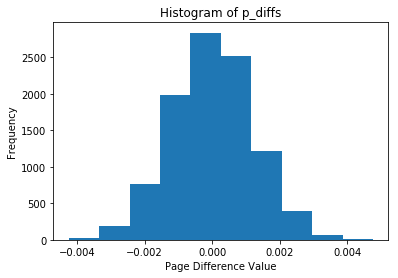

In [36]:
plt.hist(p_diffs)
plt.title("Histogram of p_diffs")
plt.xlabel("Page Difference Value")
plt.ylabel("Frequency");

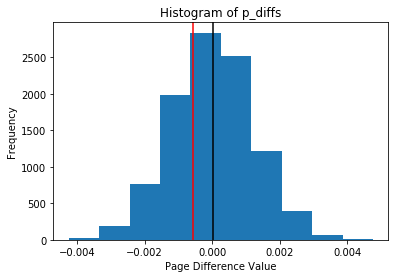

In [37]:
# We can also add in a verticle line for the mean to emphasize the distribution.

plt.hist(p_diffs)
plt.title("Histogram of p_diffs")
plt.xlabel("Page Difference Value")
plt.ylabel("Frequency")
plt.axvline(x= p_diff, color='red')
plt.axvline(x=(np.array(p_diffs).mean()), color="black")

**Histogram Observations**

We can see from the above histogram that the simulated data created a normal distribution, which would be expected considering the the random function we used for the simulation (1,0).

We also see that the mean is 0 which we would expect given the Null Hypothesis:

*Reminder: $H_0$ : $P_{new}$ - $P_{old}$ $\le$ 0*


*Summary*
- Normal Distribution
- Mean = 0
- Because normal distribution this also means median and mode = 0
- This conforms with what would be expected under the Null Hypothesis *(p_new - p_old under the null= 0)*

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [38]:
# Luckily we stored the figure for the conversion groups in the original data earlier to answer an earlier question.
# We can recall this now and compare it to p_diffs to quickly get the proportion of the p_diffs that are greater than the actual observed difference in the original data.

(p_diffs > convert_group_diff).mean()

0.90669999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

- We calculated the p-value by comparing the difference in the means of the observed difference from our simulations against the actual difference seen in the ab_data.csv dataset.
- Our p-value is shown to be greater than the Type I error rate of 5%: 0.91 > 0.05 which means that we must accept the Null Hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
#start of with importing stats. We will then get the convert stats from df2
# using the necessary data points and user_id as the unique figure to count.
# n_old and n_new are the same as used previously.

import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == 1')['user_id'].nunique()
convert_new = df2.query('landing_page == "new_page" & converted == 1')['user_id'].nunique()
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [40]:
# Following sections I used this for a reminder reference: 
# https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**

- The z-score = 1.312 - This suggests that the value is very close to the Null Mean.
- The p-value = 0.905 - This is greater than the Type I error rate of 0.05

*This evidence means we do not have the required evidence to reject the Null Hypothesis.*

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since we are looking at binary data (Conversion Data = 1 or 0) this would suggest that we should use a Logistic Regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
# starting we just view the current df2 columns.

df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


In [42]:
# add in the intercept column
df2['intercept'] = 1

df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1


In [43]:
# then we add in ab_page column which is 1 for treatment group and 0 for control group
# for reference: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [44]:
#reference material found - https://stackoverflow.com/questions/50350816/logistic-regression-get-the-sm-logit-values-python-statsmodels
import statsmodels.api as sm


#format: sm.logit(y_data, x_data)
model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
#results.summary did not work.
#solution found - https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob

results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-09 05:19 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer**

- The p-value associated with ab_page is 0.1899 (19%) however this is still above the earlier mentioned Type I error rate of 5% so the Null Hypothesis still can not be rejected. For this second test we can say that the conversion does not appear to have a significant relationship on the page.

- The reason that the p-value differs so greatly than previously is because we are using a different hypothesis in this second part than the previous testing.

- In Part II we where testing for the possibility of a relationship in one direction so this was a *one-tailed test* whilst in Part III we are using a Logistic Regression which is testing for the possibility of a relationship in both directions so this is a *two-tailed test*. This is a significant difference between the two tests.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

If we looked at the timestamp as part of our analysis we could:
- Check if Time of Day has any influence on conversion.
- Check if the Time of the Year (Month) has any influence on conversion.
- If we converted the date to Days of the Week we could check if either individual days, or Week Days vs Weekends, had any impact on conversion.

Whilst adding additional factors to our regressional model can help with reducing bias the disadvantage is that it can add high levels of complexity as we're working with more variables and these variables might bring in greater variances into our results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
# first lets read the additional csv.
#reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

df_countries = pd.read_csv('countries.csv')
df_countries.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [47]:
# creating a new table df3 with an inner join

df3 = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')

# view new table

df3.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [48]:
# Look at the unique entries of the country column.

np.unique(df3['country'])

array(['CA', 'UK', 'US'], dtype=object)

In [49]:
# create dummy columns for our new country data. We know the unique data types are CA, UK and US thanks to the above.

df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])

In [50]:
# view current headings

df3.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [51]:
# We can drop country now as it's not needed anymore.

del df3['country']

In [52]:
df3.head(5)

,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [53]:
#format: sm.logit(y_data, x_data)
#calling it result this time to differentiate from previous attempt just in case we need that variable or it causes confusion when reopening document

model_country = sm.Logit(df3['converted'],df3[['intercept','UK','US']])
result = model_country.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-09 05:19 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

**Conclusion**

- We can see that the P-Value for the UK and US respectively was 7% and 13% which would indicate that country does appear to be having some relation to conversion rate however neither are statistically significant enough from the above results to make us reconsider rejecting the Null Hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [57]:
# working from feedback provided my reviewer

df3['UK_ab_page'] = df3['UK']*df3['ab_page']
df3['US_ab_page'] = df3['US']*df3['ab_page']

df3.head(5)

,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [58]:
model_country2 = sm.Logit(df3['converted'],df3[['intercept','UK_ab_page','US_ab_page']])
result2 = model_country2.fit()
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-09 05:25 AIC:              212781.7674
No. Observations:   290584           BIC:              212813.5064
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9926    0.0079  -252.9104  0.0000  -2.0081  -1.9772
UK_ab_page    0.0112    0.0179     0.6256  0.5316  -0.0240   0.0464
US_ab_page   -0.0144    0.0125    -1.1548  0.2482  -0.0389   0.0101
==================================================================

"""

**Conclusion**

- We can see there has been no significant difference in the p-values, even the lowest of 24.8% still does not come near the Type I error rate of 5% of our Null Hypothesis.
- Because of this we continue to fail in rejecting our Null Hypothesis. We must then come to the conclusion that our data does not provide us the necessary information/evidence to suggest that there is a statistically significant relationship between an individuals country or page and their conversion rate.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0